# Example 8a: Using the Time to First Detection (TTFD) Plot Type To Assess Plume Migration and Monitoring Network Performance in an NRAP-Open-IAM Control File Simulation.

This example demonstrates how to use the TTFD plot type in the Control File Interface. Specifically, this example examines the setup of the .yaml file for Control File Example 40 (ControlFile_ex40.yaml) as well as the example's output. The figures and .csv files produced show (1) how dissolved CO$_2$ plumes (areas with a relative change in dissolved CO$_2$ concentration > 20 %) change in two aquifers in a simulation with 30 stochastic realizations, (2) the times at which the monitoring wells provided (through x, y, and z coordinates) could detect these plumes, and (3) the probability that a dissolved CO$_2$ plume forms in different regions of the aquifers.

The TTFD plot type is run after the simulation has been completed. In order to use the plot type, one must set up the system model to include certain components and certain component outputs. For example, the system model must have an aquifer component that produces plume size metrics corresponding to the type of plume being assessed (e.g., Dissolved_CO2_dx, Dissolved_CO2_dy, Dissolved_CO2_dz outputs for TTFD plots examining dissolved CO$_2$ plumes in the aquifer).

First, we review the different sections of the .yaml control file. Control files typically use the pound symbol followed by hyphens (#---) to mark separate sections, but these characters are not required. Any symbols following a pound symbol (#) will be ignored by the Python script that reads the .yaml file, so the hyphens are only there as a visual aid. Every control file must have a section called 'ModelParams'. In this section, one specifies the model times to assess ('EndTime: 15' and 'TimeStep: 1', times are in years), the type of analysis to conduct (i.e., deterministic or stochastic, controlled by the 'Analysis' entry), the names of the components included in the system model ('Components'), and the output directory to save the output ('OutputDirectory'). Here, the analysis type is lhs ('type: lhs'), which stands for Latin Hypercube Sampling. This lhs simulation will use 30 stochastic realizations ('siz: 30'). Each entry is followed by a colon (:) followed by input. Some entries take a single input value (e.g., 'EndTime: 15.') or a list of input values ('Components: [LookupTableReservoir1, MultisegmentedWellbore1, FutureGen2AZMI1, FutureGen2AZMI2]'). Some entries have other entries indented beneath them; the indented entry is on a lower line and preceeded by an additional four spaces (e.g., 'type' and 'siz' are indented beneath 'Analysis').

Next, the control file specifies the stratigraphy of the model domain. All unit thicknesses are in meters. This stratigraphy is based on the FutureGen 2.0 site. Higher unit numbers are closer to the surface and shales and aquifers always alternate. For example, shale 1 ('shale1Thickness') is above the reservoir ('reservoirThickness'), aquifer 1 ('aquifer1Thickness') is above shale 1, and shale 2 ('shale2Thickness') is above aquifer 1. Spatially variable stratigraphy can be used in control files (see control file examples 33a to 38).

Here, a LookupTableReservoir component is used to portray reservoir conditions over time. This component reads reservoir pressures and CO$_2$ saturations from .csv files included in the FutureGen 2.0 data set (https://edx.netl.doe.gov/dataset/futuregen-2-0-1008-simulation-reservoir-lookup-table). Before this example can be run, the .zip file available on the mentioned web page must be downloaded. Then, the contents of the .zip file must be extracted and placed in the folder 'data/reservoir/lookuptables/FutureGen2/1008_sims' (where the 'data' folder is within the NRAP-Open-IAM directory).

The name of the reservoir component is 'LookupTableReservoir1'; the component name is dictated by the first line in the component's section. The component type is specified through the entry 'Type: LookupTableReservoir', and the component outputs are specified through the entry 'Outputs: [pressure, CO2saturation]'. The details of the .csv files containing the output of reservoir simulations are presented through the entries 'FileDirectory', 'TimeFile', 'ParameterFilename', and 'Parameters: index: 5'. All of the .csv files used are in the directory entered for 'FileDirectory'. The index provided ('index: 5') specifies which row to use in the file entered under 'ParameterFilename' (different rows in that file contain different .csv file names each of which corresponds to a particular reservoir simulation). The .csv file provided for the 'TimeFile' entry contains the times used in the reservoir simulations.

The pressures and CO$_2$ saturations from the LookupTableReservoir component are then provided to a MultisegmentedWellbore component called 'MultisegmentedWellbore1'. The connection between the LookupTableReservoir1 component and this wellbore component is specified through the entry 'Connection: LookupTableReservoir1'. A MultisegmentedWellbore component will be created for two locations, as specified through the entry 'Number: 2'. These locations are specified through the coordx and coordy entries (easting and northing distances, in meters). The parameter values entered under 'Parameters' specify inputs like the wellbore radius ('wellRadius', in meters), the permeability of the wellbore along shale units ('logWellPerm'), and the wellbore permability across differrent aquifers (e.g., 'logAqu1Perm' for aquifer 1 and 'logAqu2Perm' for aquifer 2). Permeabilities are given in log$_{10}$ m$^2$. The logWellPerm parameter will vary stochastically between the minimum and maximum values provided ('min' and 'max'). The component outputs are specified under 'Outputs'. Note that MultisegmentedWellbore components have other parameters that are not included here (e.g., compressibility). Any parameters that are not setup by user values will automatically be assigned default parameter values.

The CO$_2$ and brine leakage rates produced by the MultisegmentedWellbore component are given as input to two FutureGen2AZMI aquifer components. Each aquifer component calculates the sizes of contaminant plumes over time. One component ('FutureGen2AZMI1') is set up to represent aquifer 1, while the other ('FutureGen2AZMI2') is set up to represent aquifer 3. This assignment is performed through the 'AquiferName' entry. While the MultisegmentedWellbore component was connected to the LookupTableReservoir component, each aquifer component is connected to the wellbore component through the entry 'Connection: MultisegmentedWellbore1'. The thickness and depth of the corresponding aquifer will automatically be assigned to each component, as is specified by the silenced text within the 'Parameters' subsection (i.e., the text preceeded by '#'). The Parameters section also specifies the porosity ('por'), permeability ('log_permh'), anisotropy ratio ('log_aniso'), and calcite within the unit ('rel_vol_frac_calcite'). The 'Outputs' entry specifies all of the output metrics to be produced by the aquifer component. The use of the TTFD plot for dissolved CO$_2$ plumes (as shown here) requires the inclusion of the Dissolved_CO2_dx, Dissolved_CO2_dy, and Dissolved_CO2_dz metrics.

Next, the .yaml control file specifies the figures to be produced through the 'Plots' section. The first three plots ('pH_plume_volumes', 'TDS_plume_volumes', and 'Dissolved_CO2_volumes') show different metrics over time. For more information regarding these plot types ('TimeSeriesAndStats' and 'TimeSeries'), see section 2.7, 'Setup of visualization options', of the NRAP-Open-IAM User Guide.

The name of the TTFD plot entry is 'TTFD_Plot', and it is specified as a TTFD plot through the inclusion of 'TTFD' indented beneath the plot name. All of the options for the TTFD plot type are then indented under 'TTFD'. Two of these entries are required: 'PlumeType' and 'ComponentNameList'. 'PlumeType' specifies the kind of plumes being examined, while 'ComponentNameList' specifies the names of the aquifer components that produce the required output. The 'PlotInjectionSites' option specifies whether to show the injection site in the figures produced, and the 'InjectionCoordx' and 'InjectionCoordy' entries specify the injection site's location. The 'FigureDPI' entry specifies the dots-per-inch (dpi) of the figures. The options indented under the 'MonitoringLocations' entry specify details regarding the monitoring equipment used to detect contaminant plumes. The x, y, and z values (easting, northing, and depths, all in meters) are entered as lists following the 'coordx', 'coordy', and 'coordz' entries. For the 'coordz' entry, depths beneath the surface are entered as negative values. The 'HorizontalWindow' and 'VerticalWindow' entries specify the horizontal and vertical distances (m) within which the sensor will detect plumes. The 'VerticalWindow' input can be regarded as the vertical extent of sensors along the monitoring well, with sensors extending above and below each 'coordz' value.

When the control file is run, the TTFD plot entry will produce three types of map-view figures: (1) figures showing the timing of plume development in the aquifer(s) considered, (2) figures showing the eariest times at which the monitoring locations provided could detect the plumes (i.e., when the location is within a plume), and (3) figures showing the probability that a plume forms in different parts of the aquifer(s) considered. The first two types of figures are made for each of the 30 realizations in the simulation, while only one probability figure is created. The probability is calculated as the number of realizations in which a plume occured at a particular location divided by the total number of realizations. All results will be saved as .csv files. Running an NRAP-Open-IAM control file depends on the type of computer used and how it was installed; for more information, see section 1.3, 'Installing NRAP-Open-IAM', of the User Guide. A control file is normally run through a command prompt (e.g., Anaconda Prompt on Anaconda Navigator). Below, we run control file example 40 through a script-based approach.

Note that this simulation take some time to run (e.g., about two to three minutes). The output will be saved to a folder called 'output_ex40_jupyter' in the 'output' folder of the NRAP-Open-IAM directory. The control file interface will print messages regarding the status of the simulation (e.g., 'Running file' or 'Analysis completed'). Once the simulation has finished and the TTFD plots are being made, one can find the figures in the 'output_ex40_jupyter' folder. Once the TTFD analysis has finished, the code below will print the statement 'Finished'.

Note that the version of control file example 40 used ('ControlFile_ex40_jupyter.yaml') is the same as the normal version ('ControlFile_ex40.yaml'), except the output directory has been changed to make accessing the output more convenient (i.e., the folder name will not contain the exact time at which it was created).

In [1]:
import sys
import os
from datetime import datetime

# Add the source folder to the path
sys.path.insert(0, os.sep.join(['..', '..', 'src']))

# Name of the control file
file_name = 'ControlFile_ex40_jupyter.yaml'

file_path = os.path.join(os.getcwd(), '..', 'Control_Files', 
                         'examples_for_jupyter_notebook', file_name)

source_dir = os.path.join(os.getcwd(), '..', '..', 'src')

# Path to the file openiam_cf.py, which is used to run control files
run_file = os.path.join(source_dir, 'openiam', 'components', 'openiam_cf.py')

# Set up the command to run the control file. The command has the format 
# 'python /path/to/openiam_cf.py --file ControlFile_ex40_jupyter.yaml'.
run_command = '"{0}" --file "{1}"'.format(
     run_file, file_path)

In [2]:
print('Running Control File example 40...')

# Run the control file
%run -i $run_command

print('Finished.')

Running Control File example 40...



INFO     
NRAP-Open-IAM version: alpha_2.8.1-23.12.15
Runtime: 2023-12-27_14.55.59 

INFO     
Running file C:\development\OpenIAMDev\examples\Jupyter_notebooks\..\Control_Files\examples_for_jupyter_notebook\ControlFile_ex40_jupyter.yaml

INFO     Not all parameters combinations are available in the linked lookup table data set. It is recommended to utilize care when sampling the data through parameters. Instead, in most cases sampling of parameter index might be sufficient.


Progress: [------------------->] 100% 30 of 30 samples completed


INFO     
Analysis completed at 2023-12-27_14.58.13.
Total run time: 0:02:13.369497 

INFO     
Simulation results and plots can be found in the output folder: 
C:\development\OpenIAMDev\output/output_ex40_jupyter


Finished.


Now, wait for the control file to finish running. The TTFD plot type will continue to run for some time after the code above print '100% 30 of 30 samples collected' (indicating that all 30 of the realizations are finished). When the TTFD plots are finished, the code above will print the statement 'Finished'.

It will make figures for each of the 30 realizations. You can check the output folder ('output_ex40_jupyter') to see when figures are produced. If the figures have been produced, the code below loads three of the figures. Otherwise, it will print a statement saying that the figure could not be found.

The figure 'Dissolved_CO2_Plume_Timings_Realization_0.png' shows the spatiotemporal evolution of dissolved CO$_2$ plumes in the first realization (index 0). There are four subplots, and each subplot shows one quarter of the depth range used in the simulation (which is set by the stratigraphy). The top of the figure has the statement 'Layers with Lower Times Shown Above Other Layers' because each subplot contains different layers for different depth intervals. Depth intervals that never had any plumes will not have any color-labelled results shown. Because these figures are meant to focus on the earliest times at which plumes occur, layers that have later times are shown beneath other layers. However, the results for all depth intervals are saved as .csv files.

The figure 'Dissolved_CO2_Monitoring_TTFD_Realization_0.png' shows when the dissolved CO$_2$ plumes first arrive at the monitoring wells specified in the first realization (index 0).

The figure 'Dissolved_CO2_Plume_Probabilities.png' shows the probability that a dissolved CO$_2$ plume will occur in different regions of the two aquifers considered (aquifer 1 and aquifer 3). Like the first figure, this probability figure has four subplots that each shows results for one quarter of the depth range and each subplot contains multiple depth intervals.

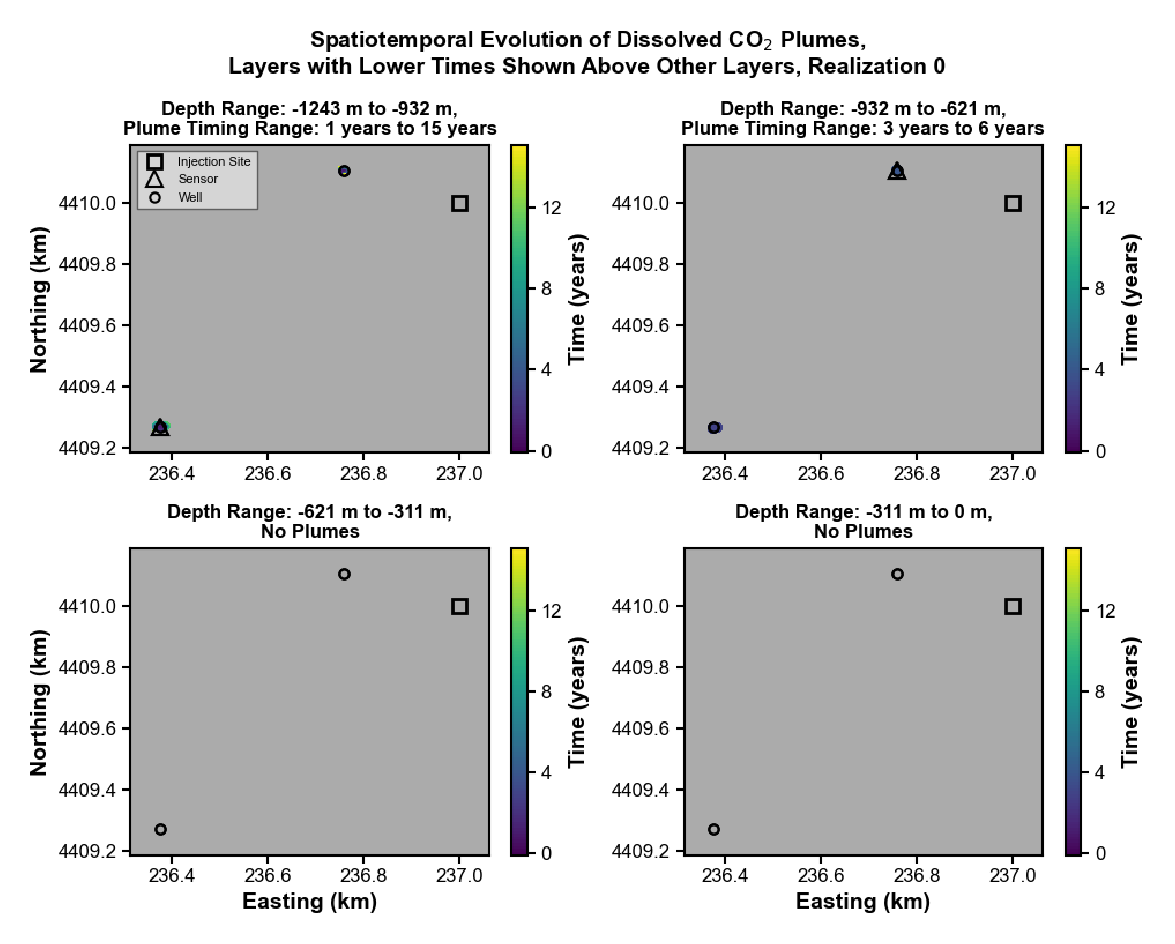

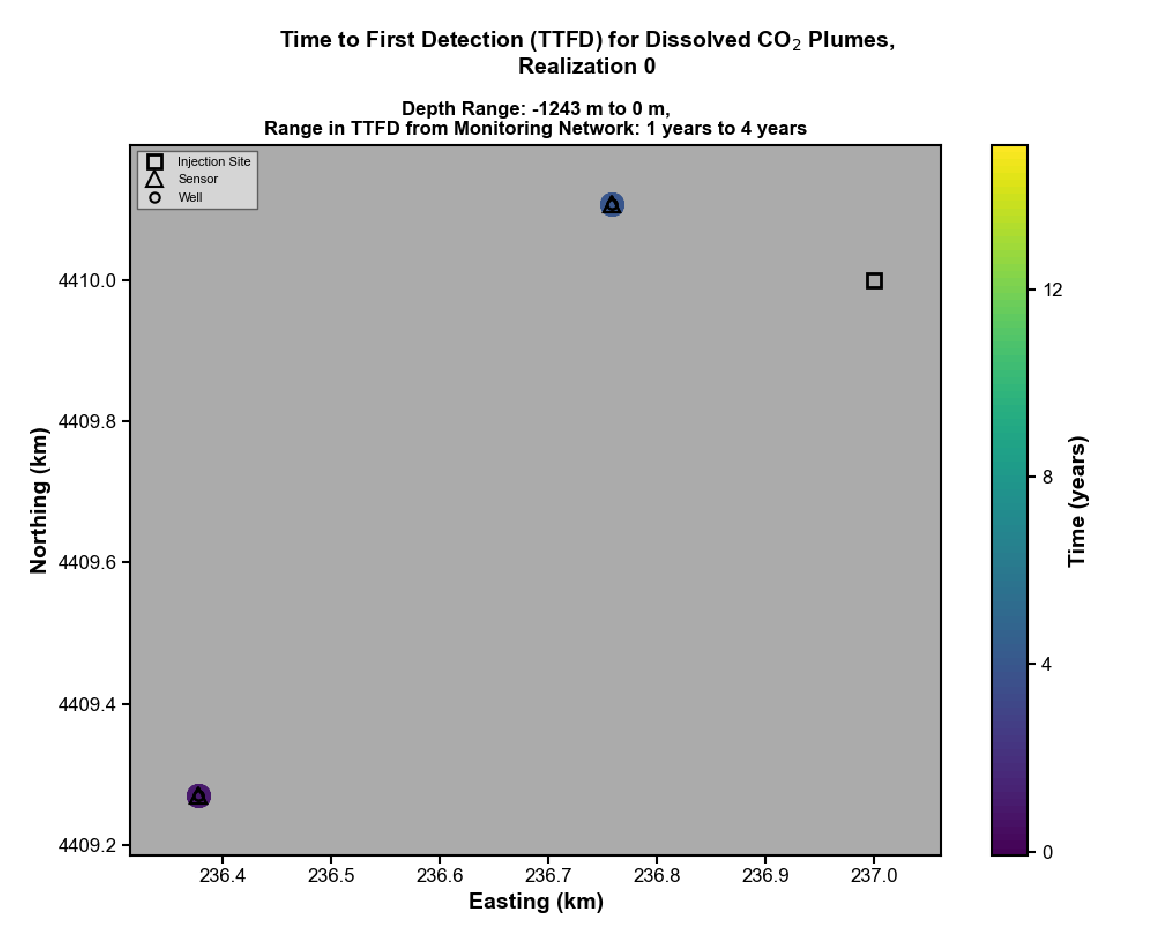

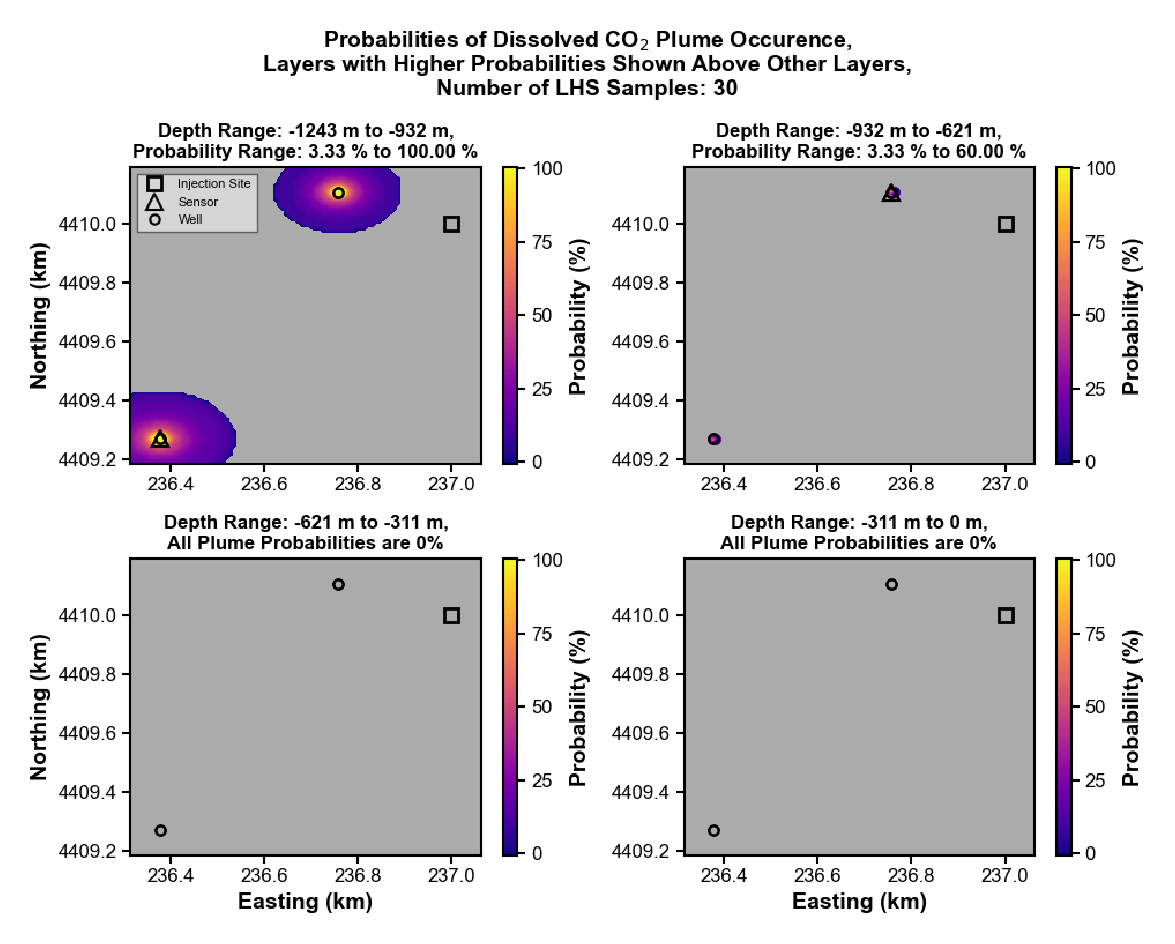

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

figure_names = ['Dissolved_CO2_Plume_Timings_Realization_0.png',
                'Dissolved_CO2_Monitoring_TTFD_Realization_0.png',
                'Dissolved_CO2_Plume_Probabilities.png']

example_output_directory = os.path.join(os.getcwd(), '..', '..', 'output', 'output_ex40_jupyter')

for figRef in range(len(figure_names)):
    file_path = os.path.join(example_output_directory, figure_names[figRef])
    
    check_for_figure = os.path.exists(file_path)
    
    if check_for_figure:
        img = mpimg.imread(file_path)
        
        # fig, ax = subplots(figsize=(20, 16))
        fig = plt.figure(figRef + 1, figsize=(15, 12), dpi=100)
        ax = plt.gca()
        
        ax.imshow(img, interpolation='nearest')
        
        # We do not need the ticks from imshow, the figure file has its own ticks
        ax.axes.get_xaxis().set_ticks([])
        ax.axes.get_yaxis().set_ticks([])
        
        # We also do not need the spline added by imshow
        plt.setp(ax.spines.values(), alpha = 0)
    else:
        print('The figure {} was not found.'.format(file_path))

plt.show()

The TTFD plot type can be used to examine worst-case scenarios of wellbore leakage and demonstrate that certain monitoring well locations can quickly detect contaminant plumes in an aquifer.

The TTFD plot type can also produce the .iam files used as input to the DREAM (Design for Risk Evaluation And Management) tool, also developed by NRAP. Such files will be produced if the entry for the TTFD plot contains the option 'WriteDreamOutput: True' indented under 'TTFD' (see control file example 41). DREAM can be used to optimize a monitoring network given simulated contaminant plumes in an aquifer.